## 機械学習のライブラリ

- TensorFlow (1番有名)
- PyTorch (2番目)
- Chainer (日本の起業)
- e.t.c

TensorFlow -> **Keras** ←使っていく

In [13]:
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

2


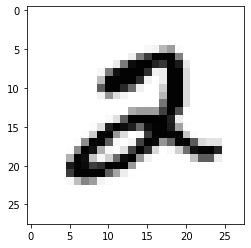

In [14]:
# Jupyter Notebookにグラフを表示させるようにする
%matplotlib inline
import matplotlib.pyplot as plt

num = 5
print(Y_train[num])
plt.imshow(X_train[num].reshape(28, 28), cmap='Greys')
plt.show()

画像のピクセルの輝度 ・・・ 0～255 → 0～1にする  
画像のクラスが  
5 → [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]  
2 → [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  

In [15]:
from tensorflow.keras.utils import to_categorical

# 特徴量の正規化
X_train = X_train / 255.0
X_test = X_test / 255.0


Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

print(Y_train[num])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [24]:
model.summary()
model.compile(loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)       

In [28]:
history = model.fit(X_train, Y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 418s 7ms/sample - loss: 0.1382 - acc: 0.9571
Epoch 2/5
60000/60000 [==============================] - 362s 6ms/sample - loss: 0.0478 - acc: 0.9851
Epoch 3/5
60000/60000 [==============================] - 397s 7ms/sample - loss: 0.0351 - acc: 0.9895
Epoch 4/5
60000/60000 [==============================] - 415s 7ms/sample - loss: 0.0271 - acc: 0.9913
Epoch 5/5
60000/60000 [==============================] - 393s 7ms/sample - loss: 0.0229 - acc: 0.9926


In [29]:
result = model.evaluate(X_test, Y_test)
print('acc = {}'.format(result[1]))

10000/10000 [==============================] - 11s 1ms/sample - loss: 0.0318 - acc: 0.9900
acc = 0.9900000095367432


[[4.0119153e-06 2.2694563e-07 1.3292055e-07 1.0481092e-09 2.4459389e-06
  2.6222281e-06 9.9998760e-01 1.5416472e-10 2.9767655e-06 2.8273227e-08]]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


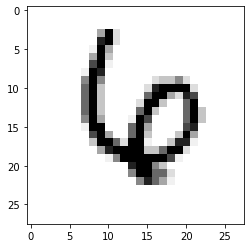

In [37]:
ans_num = 22
answer = model.predict(X_test[ans_num].reshape(1, 28, 28, 1))
print(answer)
print(Y_test[ans_num])
plt.imshow(X_test[ans_num].reshape(28, 28), cmap='Greys')
plt.show()

Copyright © 2020 Hibiki SAIGYO All RIghts Reserved.